# LIBRARIES & SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format = 'retina'

# LOAD & CLEAN DATA

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
def load_and_clean_data(file_path):
    
    df = pd.read_csv(file_path)
    print(f"Original Data Shape: {df.shape}")
    
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Handle Missing Values
    df.dropna(inplace=True)
    
    # Drop 'customerID'
    df = df.drop(columns=['customerID'])
    
    # Encode Target Variable (Churn)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    
    print(f"Cleaned Data Shape: {df.shape}")
    return df

try:
    df = load_and_clean_data('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Data Loaded and Cleaned Successfully.")
    display(df.head())
    
except FileNotFoundError:
    print("Error: File not found. Please download the Telco Churn dataset from Kaggle.")

Original Data Shape: (7043, 21)
Cleaned Data Shape: (7032, 20)
Data Loaded and Cleaned Successfully.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# FEATURE ENGINEERING
# We need to turn text (Male/Female, Yes/No) into numbers for the machine to understand.
# We use "One Hot Encoding" for this.

In [4]:
def encode_features(df):

    categorical_cols = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("Categorical Variables Encoded.")
    return df_encoded

In [5]:
df_final = encode_features(df)
print(f"Final Feature Count: {df_final.shape[1]}")
display(df_final.head())

Categorical Variables Encoded.
Final Feature Count: 31


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


# Exploratory Data Analysis (EDA)

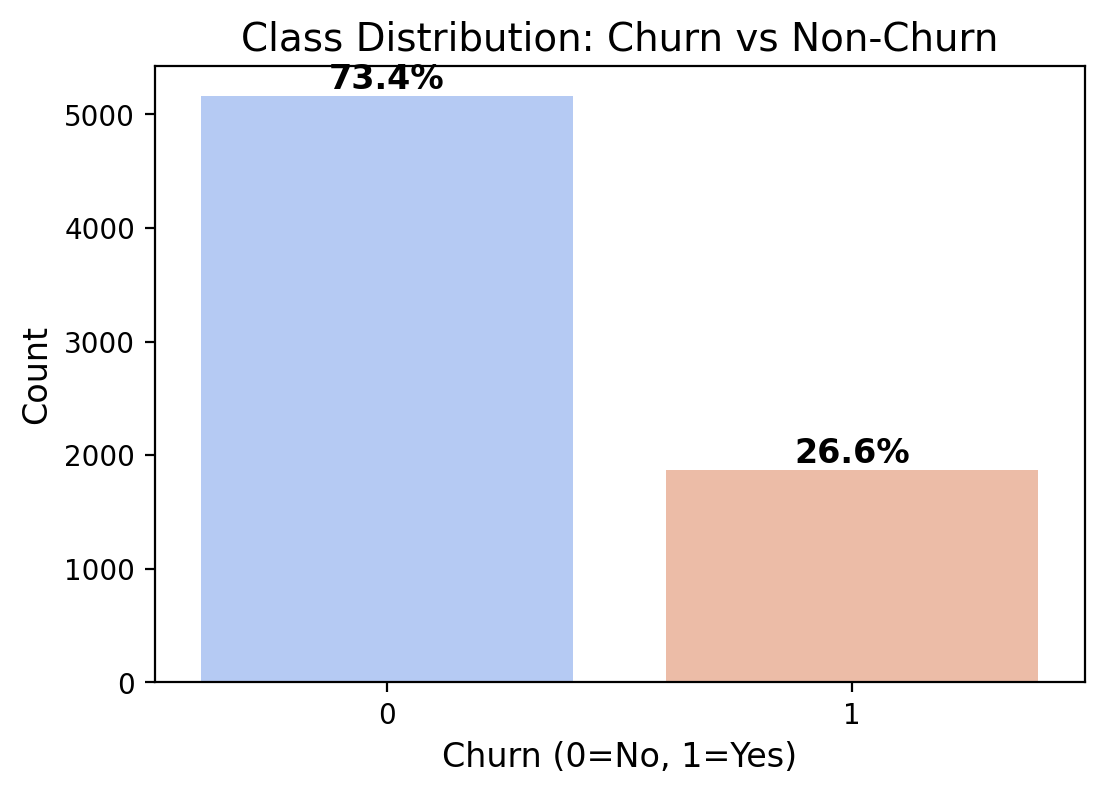

In [6]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='coolwarm')

plt.title('Class Distribution: Churn vs Non-Churn', fontsize=14)
plt.xlabel('Churn (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# Money & Tenure (Numerical Features)

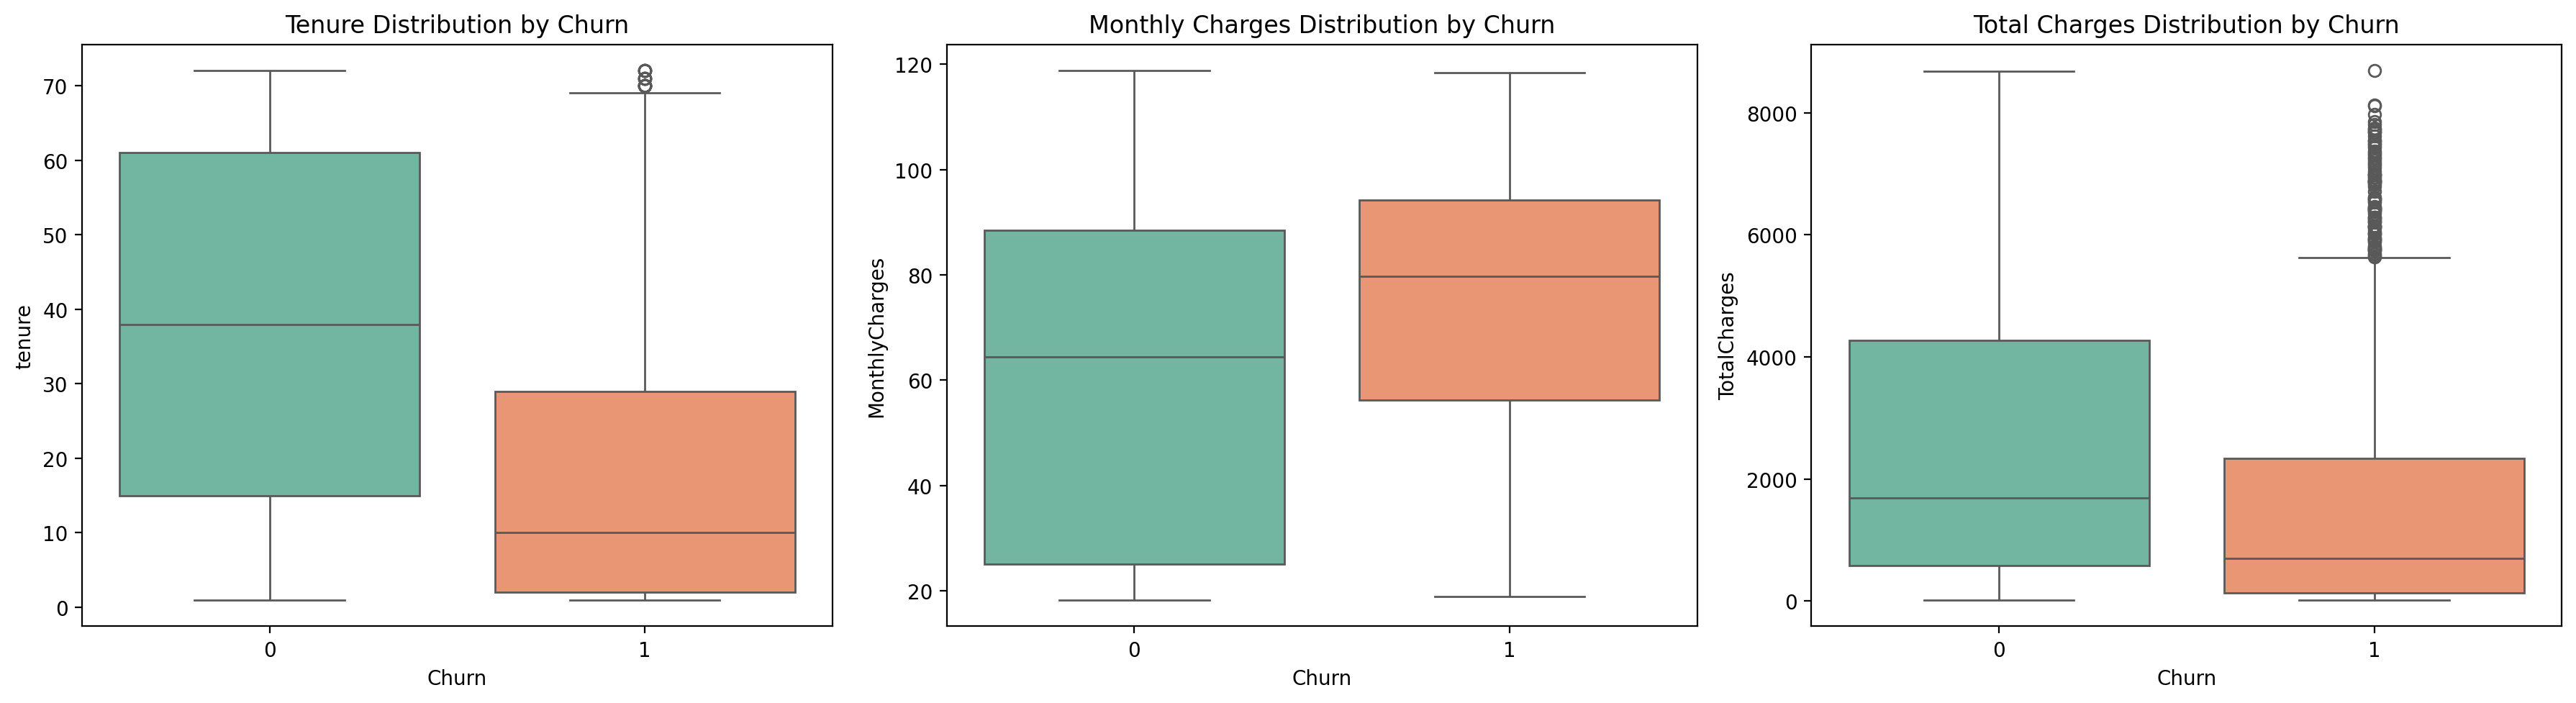

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Churn', y='tenure', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Tenure Distribution by Churn')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Monthly Charges Distribution by Churn')

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=ax[2], palette='Set2')
ax[2].set_title('Total Charges Distribution by Churn')

plt.tight_layout()
plt.show()

# Contracts & Payment (Categorical Features)

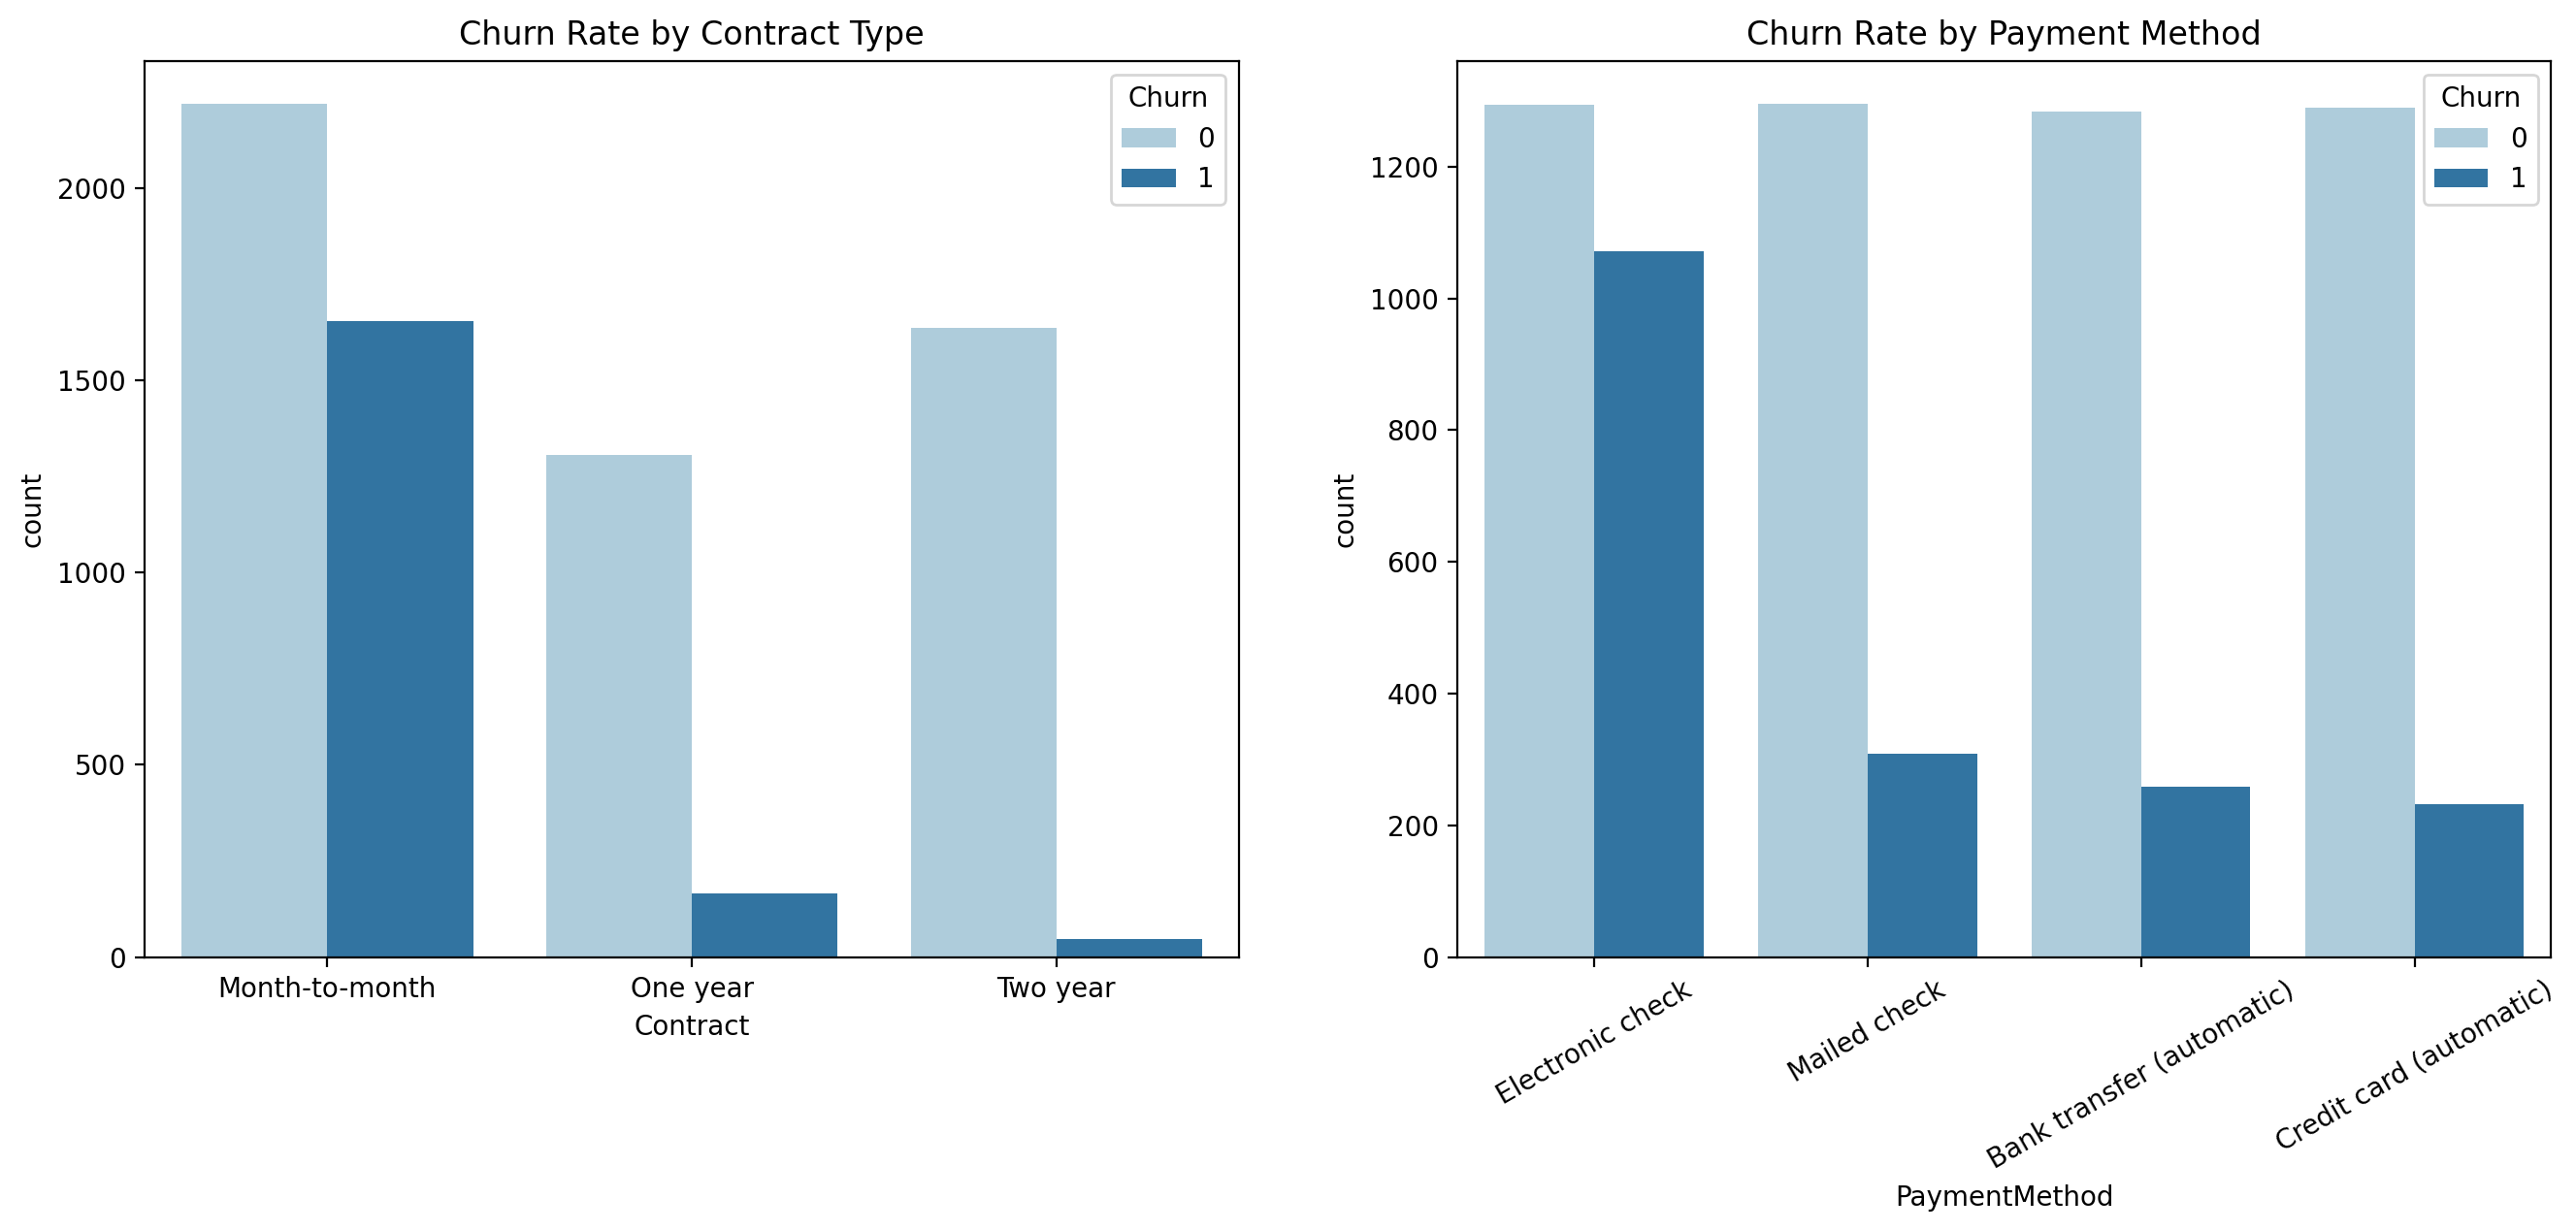

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='Contract', hue='Churn', data=df, ax=ax[0], palette='Paired')
ax[0].set_title('Churn Rate by Contract Type')

sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=ax[1], palette='Paired')
ax[1].set_title('Churn Rate by Payment Method')
ax[1].tick_params(axis='x', rotation=30)

plt.show()

# Correlation Matrix
# Let's see which features are mathematically most correlated with Churn.

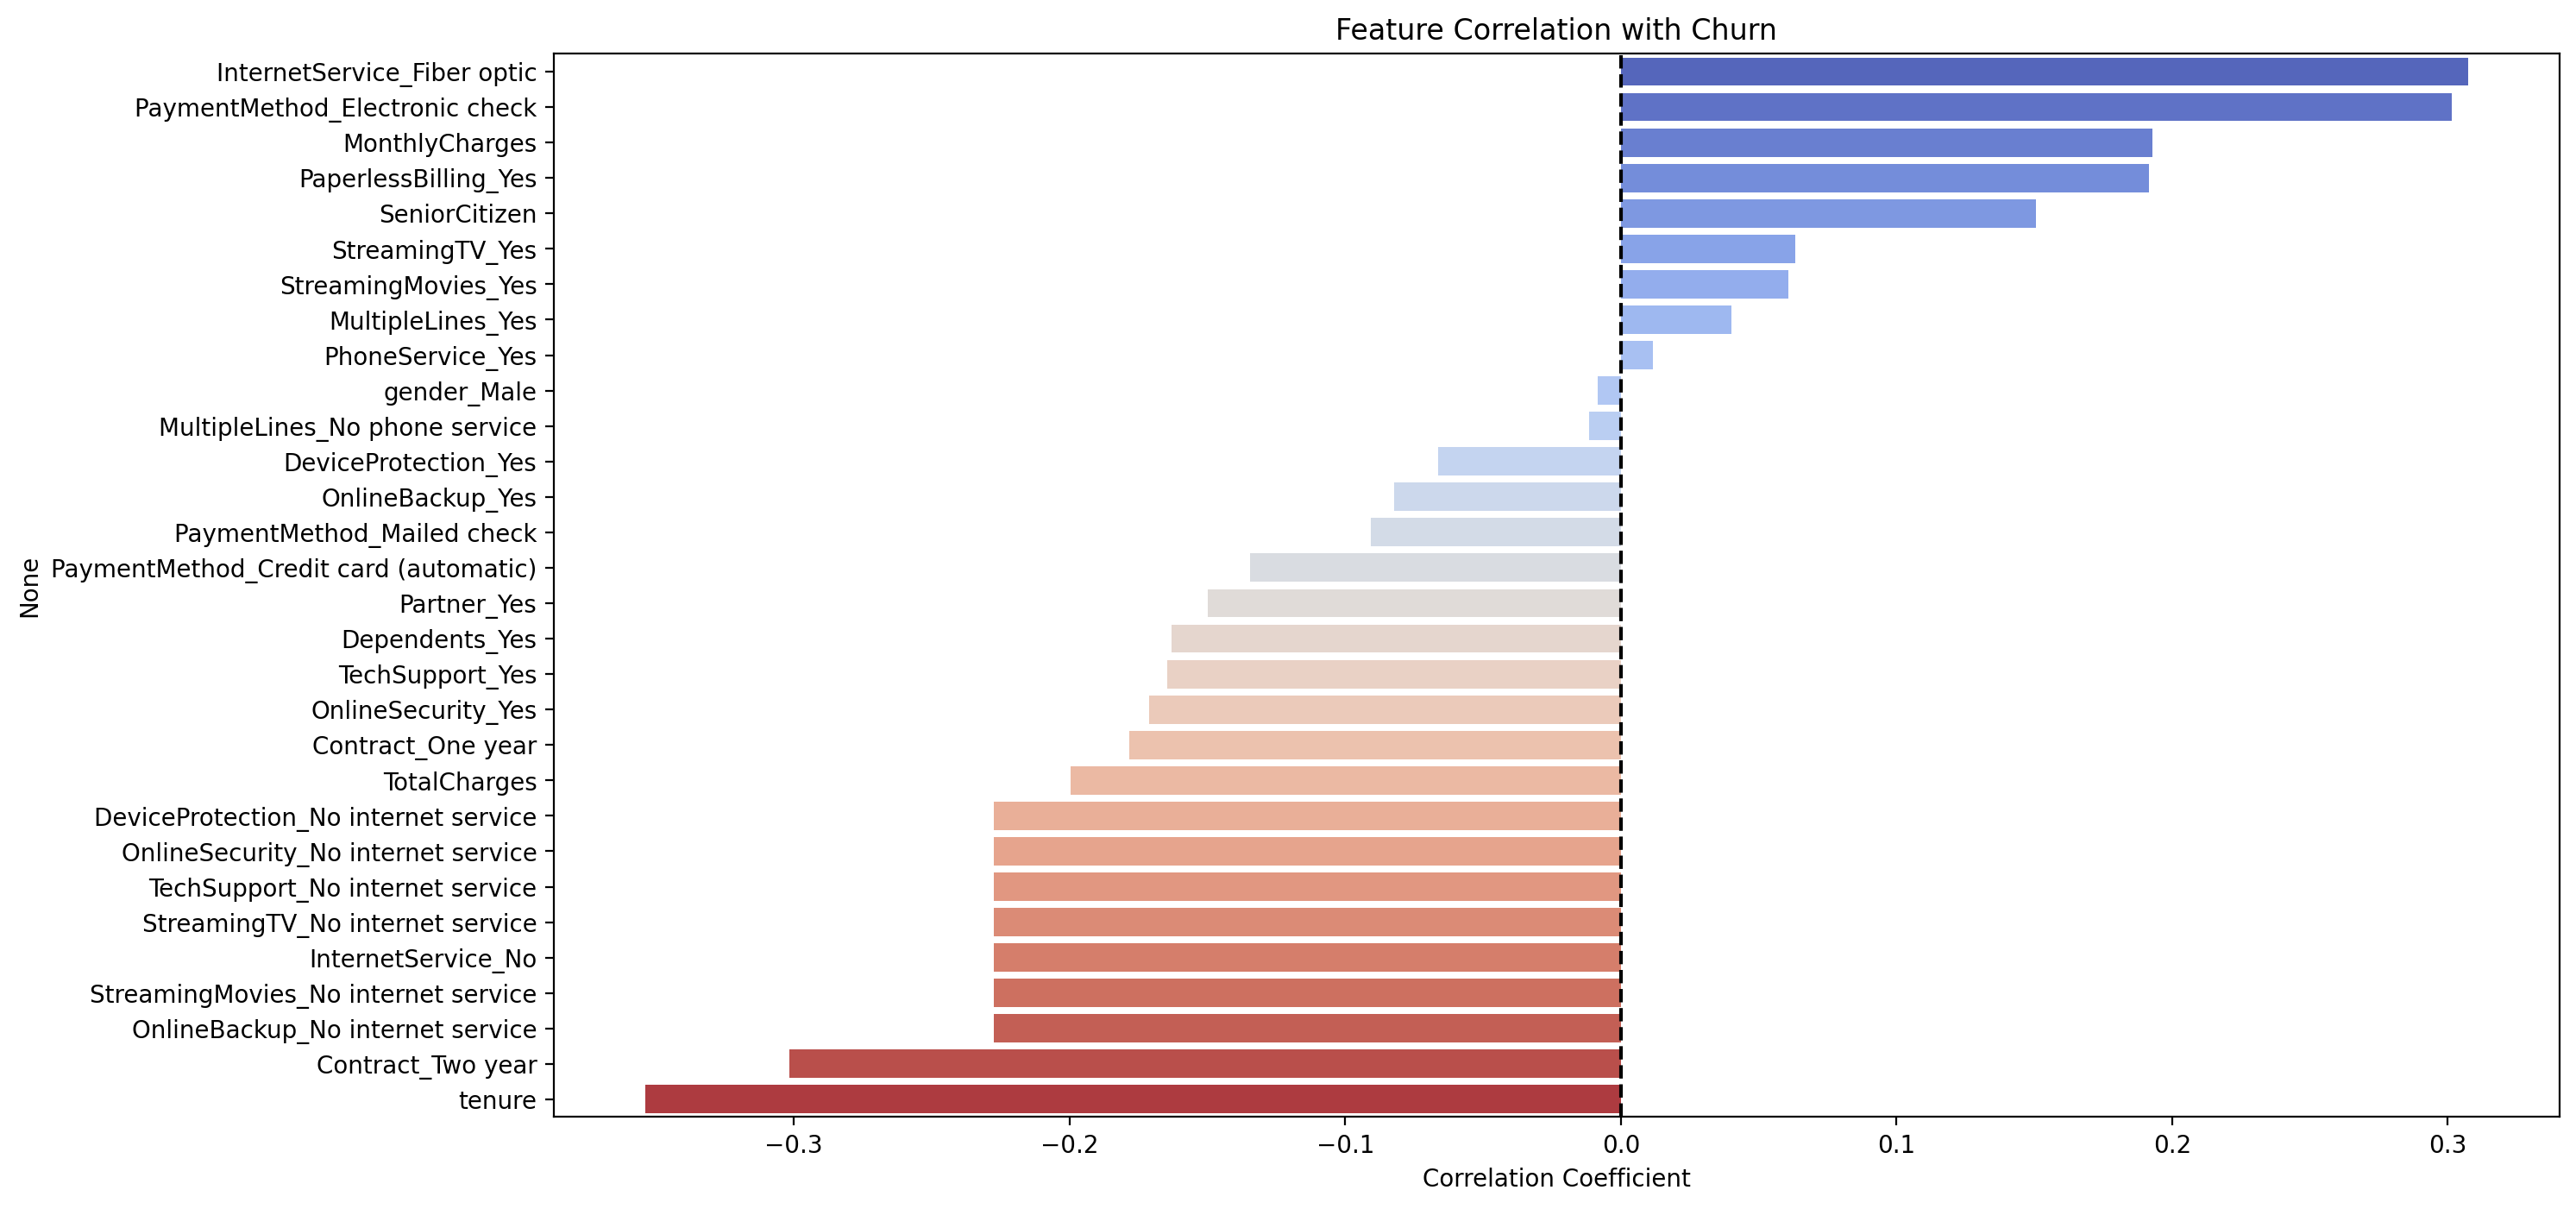

In [9]:
plt.figure(figsize=(15, 8))

# We use df_final because it has the numbers (encoded variables)
corr = df_final.corr()['Churn'].sort_values(ascending=False).drop('Churn')

sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [10]:
df_final.to_csv('processed_churn_data.csv', index=False)
print("Data saved as 'processed_churn_data.csv'. Ready for Model Building!")

Data saved as 'processed_churn_data.csv'. Ready for Model Building!
